In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import statistics

In [ ]:
iono = pd.read_csv("/content/drive/MyDrive/ml/19-12-22/datasets/csv_result-chronic_kidney_disease.csv",on_bad_lines='skip')
iono

,id,'age','bp','sg','al','su','rbc','pc','pcc','ba',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48,80,1.020,1,0,?,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,?,normal,notpresent,notpresent,...,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,396,55,80,1.020,0,0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
393,397,42,70,1.025,0,0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
394,398,12,80,1.020,0,0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
395,399,17,60,1.025,0,0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
iono["'rbc'"]=pd.get_dummies(iono["'rbc'"])[pd.get_dummies(iono["'rbc'"]).columns[0]]
iono["'pc'"]=pd.get_dummies(iono["'pc'"])[pd.get_dummies(iono["'pc'"]).columns[0]]
iono["'pcc'"]=pd.get_dummies(iono["'pcc'"])[pd.get_dummies(iono["'pcc'"]).columns[0]]
iono["'ba'"]=pd.get_dummies(iono["'ba'"])[pd.get_dummies(iono["'ba'"]).columns[0]]
iono["'htn'"]=pd.get_dummies(iono["'htn'"])[pd.get_dummies(iono["'htn'"]).columns[0]]
iono["'dm'"]=pd.get_dummies(iono["'dm'"])[pd.get_dummies(iono["'dm'"]).columns[0]]
iono["'cad'"]=pd.get_dummies(iono["'cad'"])[pd.get_dummies(iono["'cad'"]).columns[0]]
iono["'appet'"]=pd.get_dummies(iono["'appet'"])[pd.get_dummies(iono["'appet'"]).columns[0]]
iono["'pe'"]=pd.get_dummies(iono["'pe'"])[pd.get_dummies(iono["'pe'"]).columns[0]]
iono["'ane'"]=pd.get_dummies(iono["'ane'"])[pd.get_dummies(iono["'ane'"]).columns[0]]
iono

,id,'age','bp','sg','al','su','rbc','pc','pcc','ba',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48,80,1.020,1,0,1,0,0,0,...,44,7800,5.2,0,0,0,0,0,0,ckd
1,2,7,50,1.020,4,0,1,0,0,0,...,38,6000,?,0,0,0,0,0,0,ckd
2,3,62,80,1.010,2,3,0,0,0,0,...,31,7500,?,0,0,0,0,0,0,ckd
3,4,48,70,1.005,4,0,0,0,0,0,...,32,6700,3.9,0,0,0,0,0,0,ckd
4,5,51,80,1.010,2,0,0,0,0,0,...,35,7300,4.6,0,0,0,0,0,0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,396,55,80,1.020,0,0,0,0,0,0,...,47,6700,4.9,0,0,0,0,0,0,notckd
393,397,42,70,1.025,0,0,0,0,0,0,...,54,7800,6.2,0,0,0,0,0,0,notckd
394,398,12,80,1.020,0,0,0,0,0,0,...,49,6600,5.4,0,0,0,0,0,0,notckd
395,399,17,60,1.025,0,0,0,0,0,0,...,51,7200,5.9,0,0,0,0,0,0,notckd


In [ ]:
iono=iono.drop('id',axis=1)
iono

,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,48,80,1.020,1,0,1,0,0,0,121,...,44,7800,5.2,0,0,0,0,0,0,ckd
1,7,50,1.020,4,0,1,0,0,0,?,...,38,6000,?,0,0,0,0,0,0,ckd
2,62,80,1.010,2,3,0,0,0,0,423,...,31,7500,?,0,0,0,0,0,0,ckd
3,48,70,1.005,4,0,0,0,0,0,117,...,32,6700,3.9,0,0,0,0,0,0,ckd
4,51,80,1.010,2,0,0,0,0,0,106,...,35,7300,4.6,0,0,0,0,0,0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,55,80,1.020,0,0,0,0,0,0,140,...,47,6700,4.9,0,0,0,0,0,0,notckd
393,42,70,1.025,0,0,0,0,0,0,75,...,54,7800,6.2,0,0,0,0,0,0,notckd
394,12,80,1.020,0,0,0,0,0,0,100,...,49,6600,5.4,0,0,0,0,0,0,notckd
395,17,60,1.025,0,0,0,0,0,0,114,...,51,7200,5.9,0,0,0,0,0,0,notckd


In [ ]:
for i in range(len(iono.columns)):
  iono[iono.columns[i:i+1]]=iono[iono.columns[i:i+1]].replace("?",statistics.mode(np.array(iono[iono.columns[i:i+1]])[:,0]))
  iono[iono.columns[i:i+1]]=iono[iono.columns[i:i+1]].replace("?",np.nan)
  try:
    iono[iono.columns[i:i+1]]=iono[iono.columns[i:i+1]].replace(np.nan,np.nanmean(np.array(iono[iono.columns[i:i+1]])[:,0],dtype=float))
  except:
    pass
    

In [ ]:
labels = np.array(iono)[:,-1]
k=len(set(labels))
k

2

In [ ]:
ionoarr= np.array(iono)[:,:-1]
ionoarr

array([['48', '80', '1.020', ..., 0, 0, 0],
       ['7', '50', '1.020', ..., 0, 0, 0],
       ['62', '80', '1.010', ..., 0, 0, 0],
       ...,
       ['12', '80', '1.020', ..., 0, 0, 0],
       ['17', '60', '1.025', ..., 0, 0, 0],
       ['58', '80', '1.025', ..., 0, 0, 0]], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(ionoarr))
ionoarr=scaler.transform(ionoarr)

StandardScaler()


In [ ]:
def kmean(a):
  a=np.array(a,dtype=float)
  b=np.sort(a)
  cluster=[]
  med=[]
  alt=0
  for i in range(2,k+1):
    alt=alt+1
    med.append(np.percentile(a,100*1*alt/k))
  med.sort()
  x=0
  y=0
  for j in range(len(b)):
    if(b[j]>med[x]):
      cluster.append(b[y:j])
      y=j
      x=x+1
      if(x>k-2):
        break
  cluster.append(b[y:])
  centroid=[0 for i in range(k)]
  sse=0
  for i in range(len(cluster)):
    centroid[i]=np.median(cluster[i])
    #print(np.sum(np.absolute((centroid[i]-cluster[i])**2)))
    sse=sse+np.sum((centroid[i]-cluster[i])**2)
  #print(sse)
  #print(centroid)
  #print(cluster)
  return sse/k
l=[]
sseval=[]
for i in range(len(ionoarr[0])):
  if(len(set(ionoarr[:,i]))<2):
    l.append([np.NaN,i])
  else:
    sseval.append(kmean(ionoarr[:,i]))
    l.append([kmean(ionoarr[:,i]),i])
l.sort()
print(l)
print(len(l))
threshold = (np.nanmin(sseval)+np.nanmax(sseval))/2
threshold
threshlist=[]#removed null values from list
for i in range(len(l)):
#  print(l[i][0])
  if(np.isnan(l[i][0])):
    continue
  else:
      threshlist.append(l[i])
print(threshlist)
sixtyper=[]
ans=[]
for i in range(int(len(threshlist)*0.6)):
  sixtyper.append(threshlist[i])
  ans.append(threshlist[i][0])
print(sixtyper)
print(len(sixtyper))

[[0.0, 5], [0.0, 6], [0.0, 7], [0.0, 8], [0.0, 18], [0.0, 19], [0.0, 20], [0.0, 21], [0.0, 22], [0.0, 23], [48.71263280943985, 4], [55.59410619704371, 3], [79.0958787660262, 14], [83.22958781912376, 0], [88.3613246520529, 15], [101.80041888061727, 1], [111.4578300618465, 2], [119.23365919272047, 16], [135.54048440707084, 17], [148.1458121937928, 10], [155.69832839722378, 9], [162.53334650807338, 12], [187.33961395747406, 11], [189.06224169595092, 13]]
24
[[0.0, 5], [0.0, 6], [0.0, 7], [0.0, 8], [0.0, 18], [0.0, 19], [0.0, 20], [0.0, 21], [0.0, 22], [0.0, 23], [48.71263280943985, 4], [55.59410619704371, 3], [79.0958787660262, 14], [83.22958781912376, 0], [88.3613246520529, 15], [101.80041888061727, 1], [111.4578300618465, 2], [119.23365919272047, 16], [135.54048440707084, 17], [148.1458121937928, 10], [155.69832839722378, 9], [162.53334650807338, 12], [187.33961395747406, 11], [189.06224169595092, 13]]
[[0.0, 5], [0.0, 6], [0.0, 7], [0.0, 8], [0.0, 18], [0.0, 19], [0.0, 20], [0.0, 21], 

In [ ]:
for i in sixtyper:
  i.append(iono.columns[[i[1]][0]])
print(sixtyper)

[[0.0, 5, "'rbc'"], [0.0, 6, "'pc'"], [0.0, 7, "'pcc'"], [0.0, 8, "'ba'"], [0.0, 18, "'htn'"], [0.0, 19, "'dm'"], [0.0, 20, "'cad'"], [0.0, 21, "'appet'"], [0.0, 22, "'pe'"], [0.0, 23, "'ane'"], [48.71263280943985, 4, "'su'"], [55.59410619704371, 3, "'al'"], [79.0958787660262, 14, "'hemo'"], [83.22958781912376, 0, "'age'"]]


In [ ]:
xy=pd.DataFrame()
for i in sixtyper:
  xy[iono.columns[i[1]]]=pd.to_numeric(iono[iono.columns[i[1]]])
xy

,'rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','su','al','hemo','age'
0,1,0,0,0,0,0,0,0,0,0,0,1,15.4,48
1,1,0,0,0,0,0,0,0,0,0,0,4,11.3,7
2,0,0,0,0,0,0,0,0,0,0,3,2,9.6,62
3,0,0,0,0,0,0,0,0,0,0,0,4,11.2,48
4,0,0,0,0,0,0,0,0,0,0,0,2,11.6,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0,0,0,0,0,0,0,0,0,0,0,0,15.7,55
393,0,0,0,0,0,0,0,0,0,0,0,0,16.5,42
394,0,0,0,0,0,0,0,0,0,0,0,0,15.8,12
395,0,0,0,0,0,0,0,0,0,0,0,0,14.2,17


In [ ]:
correlation_frame=xy.corr()
correlation_frame

,'rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','su','al','hemo','age'
'rbc',1.000000,0.441433,-0.026600,-0.026600,-0.055452,-0.055452,-0.055452,-0.039161,-0.039161,-0.039161,0.055857,-0.134322,-0.265146,0.179310
'pc',0.441433,1.000000,0.023522,0.023522,-0.031485,-0.031485,-0.031485,-0.022235,-0.022235,-0.022235,-0.031576,-0.189319,-0.169051,0.166429
'pcc',-0.026600,0.023522,1.000000,1.000000,-0.007179,-0.007179,-0.007179,-0.005070,-0.005070,-0.005070,-0.037687,-0.069219,0.070929,-0.066307
'ba',-0.026600,0.023522,1.000000,1.000000,-0.007179,-0.007179,-0.007179,-0.005070,-0.005070,-0.005070,-0.037687,-0.069219,0.070929,-0.066307
'htn',-0.055452,-0.031485,-0.007179,-0.007179,1.000000,1.000000,1.000000,-0.003576,-0.003576,-0.003576,-0.026581,-0.048821,0.087227,0.011955
'dm',-0.055452,-0.031485,-0.007179,-0.007179,1.000000,1.000000,1.000000,-0.003576,-0.003576,-0.003576,-0.026581,-0.048821,0.087227,0.011955
'cad',-0.055452,-0.031485,-0.007179,-0.007179,1.000000,1.000000,1.000000,-0.003576,-0.003576,-0.003576,-0.026581,-0.048821,0.087227,0.011955
'appet',-0.039161,-0.022235,-0.005070,-0.005070,-0.003576,-0.003576,-0.003576,1.000000,1.000000,1.000000,-0.018772,-0.034478,0.032920,0.069167
'pe',-0.039161,-0.022235,-0.005070,-0.005070,-0.003576,-0.003576,-0.003576,1.000000,1.000000,1.000000,-0.018772,-0.034478,0.032920,0.069167
'ane',-0.039161,-0.022235,-0.005070,-0.005070,-0.003576,-0.003576,-0.003576,1.000000,1.000000,1.000000,-0.018772,-0.034478,0.032920,0.069167


In [ ]:
for i in range(len(correlation_frame)):
  for j in range(len(correlation_frame)):
    if(correlation_frame.iloc[i,j]<-0.7 or correlation_frame.iloc[i,j]>0.7):
      correlation_frame.iloc[i,j]=None
correlation_frame

,'rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','su','al','hemo','age'
'rbc',NaN,0.441433,-0.026600,-0.026600,-0.055452,-0.055452,-0.055452,-0.039161,-0.039161,-0.039161,0.055857,-0.134322,-0.265146,0.179310
'pc',0.441433,NaN,0.023522,0.023522,-0.031485,-0.031485,-0.031485,-0.022235,-0.022235,-0.022235,-0.031576,-0.189319,-0.169051,0.166429
'pcc',-0.026600,0.023522,NaN,NaN,-0.007179,-0.007179,-0.007179,-0.005070,-0.005070,-0.005070,-0.037687,-0.069219,0.070929,-0.066307
'ba',-0.026600,0.023522,NaN,NaN,-0.007179,-0.007179,-0.007179,-0.005070,-0.005070,-0.005070,-0.037687,-0.069219,0.070929,-0.066307
'htn',-0.055452,-0.031485,-0.007179,-0.007179,NaN,NaN,NaN,-0.003576,-0.003576,-0.003576,-0.026581,-0.048821,0.087227,0.011955
'dm',-0.055452,-0.031485,-0.007179,-0.007179,NaN,NaN,NaN,-0.003576,-0.003576,-0.003576,-0.026581,-0.048821,0.087227,0.011955
'cad',-0.055452,-0.031485,-0.007179,-0.007179,NaN,NaN,NaN,-0.003576,-0.003576,-0.003576,-0.026581,-0.048821,0.087227,0.011955
'appet',-0.039161,-0.022235,-0.005070,-0.005070,-0.003576,-0.003576,-0.003576,NaN,NaN,NaN,-0.018772,-0.034478,0.032920,0.069167
'pe',-0.039161,-0.022235,-0.005070,-0.005070,-0.003576,-0.003576,-0.003576,NaN,NaN,NaN,-0.018772,-0.034478,0.032920,0.069167
'ane',-0.039161,-0.022235,-0.005070,-0.005070,-0.003576,-0.003576,-0.003576,NaN,NaN,NaN,-0.018772,-0.034478,0.032920,0.069167


In [ ]:
len(correlation_frame)

14

In [ ]:
drop=[]
for i in range(len(correlation_frame)):
  l=np.array(correlation_frame[correlation_frame.columns[i:i+1]])
  if(np.count_nonzero(np.isnan(l))>1):
    drop.append(correlation_frame.columns[i:i+1][0])
len(drop)
drop

["'pcc'", "'ba'", "'htn'", "'dm'", "'cad'", "'appet'", "'pe'", "'ane'"]

In [ ]:
eliminated=xy.drop(drop,axis=1)
eliminated

,'rbc','pc','su','al','hemo','age'
0,1,0,0,1,15.4,48
1,1,0,0,4,11.3,7
2,0,0,3,2,9.6,62
3,0,0,0,4,11.2,48
4,0,0,0,2,11.6,51
...,...,...,...,...,...,...
392,0,0,0,0,15.7,55
393,0,0,0,0,16.5,42
394,0,0,0,0,15.8,12
395,0,0,0,0,14.2,17


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB()

In [ ]:
clf.fit(eliminated[eliminated.columns[0:len(eliminated.columns)]],labels)

GaussianNB()

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
accur=[]
for i in range(1,len(eliminated.columns)):  
  X_train, X_test, y_train, y_test = train_test_split(eliminated[eliminated.columns[0:i]],labels , test_size=0.4, random_state=1)
  
  gnb = GaussianNB()
  gnb.fit(X_train, y_train)
# making predictions on the testing set
  y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
  
  print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
  accur.append([metrics.accuracy_score(y_test, y_pred)*100,str(i+1)+"features",[eliminated.columns[j:j+1][0] for j in range(i+1)]])
print(accur)
print(len(accur))

Gaussian Naive Bayes model accuracy(in %): 71.69811320754717
Gaussian Naive Bayes model accuracy(in %): 74.21383647798741
Gaussian Naive Bayes model accuracy(in %): 53.459119496855344
Gaussian Naive Bayes model accuracy(in %): 79.24528301886792
Gaussian Naive Bayes model accuracy(in %): 81.13207547169812
[[71.69811320754717, '2features', ["'rbc'", "'pc'"]], [74.21383647798741, '3features', ["'rbc'", "'pc'", "'su'"]], [53.459119496855344, '4features', ["'rbc'", "'pc'", "'su'", "'al'"]], [79.24528301886792, '5features', ["'rbc'", "'pc'", "'su'", "'al'", "'hemo'"]], [81.13207547169812, '6features', ["'rbc'", "'pc'", "'su'", "'al'", "'hemo'", "'age'"]]]
5


In [ ]:
iono=iono.drop("'class'",axis=1)

In [ ]:
from collections import Counter
import math
def entropy(labels):
    entropy=0
    label_counts = Counter(labels)
    for label in label_counts:
        prob_of_label = label_counts[label] / len(labels)
        entropy -= prob_of_label * math.log2(prob_of_label)
    return entropy

def information_gain(starting_labels, split_labels):
    info_gain = entropy(starting_labels)
    for branched_subset in split_labels:
        info_gain -= len(branched_subset) * entropy(branched_subset) / len(starting_labels)
    return info_gain

In [ ]:
def split(dataset, column):
    split_data = []
    col_vals = iono[column].unique() # This tree generation method only works with discrete values
    for col_val in col_vals:
        split_data.append(dataset[dataset[column] == col_val])
    return(split_data)
l=[]
def find_best_split(dataset):
    best_gain = 0
    best_feature = 0
    features = list(dataset.columns)
    features.remove("'age'")
    for feature in features:
        split_data = split(dataset, feature)
        split_labels = [dataframe["'age'"] for dataframe in split_data]
        gain = information_gain(dataset["'age'"], split_labels)
        l.append([gain,iono.columns.get_loc(feature)])
        if gain > best_gain:
            best_gain, best_feature = gain, feature
    print(best_feature, best_gain)
    return best_feature, best_gain

new_data = split(iono, find_best_split(iono)[0]) # contains a list of dataframes after splitting
print(l)
l.sort()

'bgr' 3.8199012888927473
[[0.7135943179697557, 1], [0.5180736145951876, 2], [0.5502562284914725, 3], [0.3249697673364223, 4], [0.19846545165332952, 5], [0.15165797219788468, 6], [0.04280489792555527, 7], [0.04280489792555527, 8], [3.8199012888927473, 9], [3.5680001157631542, 10], [2.7867604435683786, 11], [1.8272668602754882, 12], [2.0819795869755335, 13], [3.6760820827118734, 14], [2.3129966176119905, 15], [2.9443277937374055, 16], [2.2710754987665993, 17], [0.024797238904183665, 18], [0.024797238904183665, 19], [0.024797238904183665, 20], [0.017200904827193497, 21], [0.017200904827193497, 22], [0.017200904827193497, 23]]


In [ ]:
l.sort()
l.reverse()
for i in l:
  i.append(iono.columns[[i[1]][0]])
print(l)

[[3.8199012888927473, 9, "'bgr'"], [3.6760820827118734, 14, "'hemo'"], [3.5680001157631542, 10, "'bu'"], [2.9443277937374055, 16, "'wbcc'"], [2.7867604435683786, 11, "'sc'"], [2.3129966176119905, 15, "'pcv'"], [2.2710754987665993, 17, "'rbcc'"], [2.0819795869755335, 13, "'pot'"], [1.8272668602754882, 12, "'sod'"], [0.7135943179697557, 1, "'bp'"], [0.5502562284914725, 3, "'al'"], [0.5180736145951876, 2, "'sg'"], [0.3249697673364223, 4, "'su'"], [0.19846545165332952, 5, "'rbc'"], [0.15165797219788468, 6, "'pc'"], [0.04280489792555527, 8, "'ba'"], [0.04280489792555527, 7, "'pcc'"], [0.024797238904183665, 20, "'cad'"], [0.024797238904183665, 19, "'dm'"], [0.024797238904183665, 18, "'htn'"], [0.017200904827193497, 23, "'ane'"], [0.017200904827193497, 22, "'pe'"], [0.017200904827193497, 21, "'appet'"]]


In [ ]:
xyz=pd.DataFrame()
for i in l:
  xyz[iono[iono.columns[i[1]:i[1]+1]].columns[0]]=iono[iono.columns[i[1]:i[1]+1]]
xyz

,'bgr','hemo','bu','wbcc','sc','pcv','rbcc','pot','sod','bp',...,'rbc','pc','ba','pcc','cad','dm','htn','ane','pe','appet'
0,121,15.4,36,7800,1.2,44,5.2,4.630868,137.508013,80,...,1,0,0,0,0,0,0,0,0,0
1,147.864407,11.3,18,6000,0.8,38,4.702247,4.630868,137.508013,50,...,1,0,0,0,0,0,0,0,0,0
2,423,9.6,53,7500,1.8,31,4.702247,4.630868,137.508013,80,...,0,0,0,0,0,0,0,0,0,0
3,117,11.2,56,6700,3.8,32,3.9,2.5,111,70,...,0,0,0,0,0,0,0,0,0,0
4,106,11.6,26,7300,1.4,35,4.6,4.630868,137.508013,80,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,140,15.7,49,6700,0.5,47,4.9,4.9,150,80,...,0,0,0,0,0,0,0,0,0,0
393,75,16.5,31,7800,1.2,54,6.2,3.5,141,70,...,0,0,0,0,0,0,0,0,0,0
394,100,15.8,26,6600,0.6,49,5.4,4.4,137,80,...,0,0,0,0,0,0,0,0,0,0
395,114,14.2,50,7200,1.0,51,5.9,4.9,135,60,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
accur1=[]
for i in range(1,23):  
  X_train, X_test, y_train, y_test = train_test_split(xyz[xyz.columns[0:i]],labels , test_size=0.4, random_state=1)

  gnb = GaussianNB()
  gnb.fit(X_train, y_train)
  
# making predictions on the testing set
  y_pred = gnb.predict(X_test)
  #print(y_pred)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
  
  print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
  accur1.append([metrics.accuracy_score(y_test, y_pred)*100,str(i+1)+"features",[xyz.columns[j:j+1][0] for j in range(i+1)]])
print(accur1)

Gaussian Naive Bayes model accuracy(in %): 75.47169811320755
Gaussian Naive Bayes model accuracy(in %): 91.82389937106919
Gaussian Naive Bayes model accuracy(in %): 89.30817610062893
Gaussian Naive Bayes model accuracy(in %): 89.30817610062893
Gaussian Naive Bayes model accuracy(in %): 84.90566037735849
Gaussian Naive Bayes model accuracy(in %): 89.937106918239
Gaussian Naive Bayes model accuracy(in %): 90.56603773584906
Gaussian Naive Bayes model accuracy(in %): 86.16352201257862
Gaussian Naive Bayes model accuracy(in %): 85.53459119496856
Gaussian Naive Bayes model accuracy(in %): 86.16352201257862
Gaussian Naive Bayes model accuracy(in %): 92.45283018867924
Gaussian Naive Bayes model accuracy(in %): 92.45283018867924
Gaussian Naive Bayes model accuracy(in %): 93.08176100628931
Gaussian Naive Bayes model accuracy(in %): 94.33962264150944
Gaussian Naive Bayes model accuracy(in %): 94.33962264150944
Gaussian Naive Bayes model accuracy(in %): 94.33962264150944
Gaussian Naive Bayes model

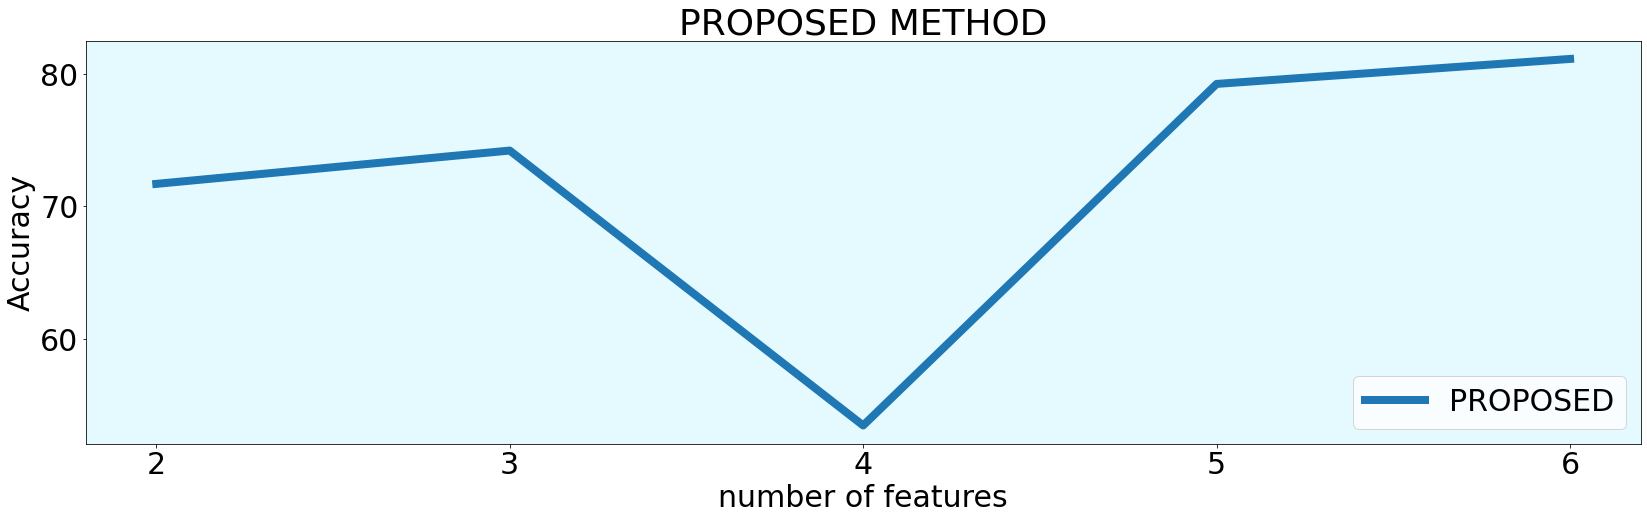

In [ ]:
import matplotlib
plt.rcParams['figure.figsize'] = [27, 7]
matplotlib.rcParams['font.family'] = 'Comic Sans MS'
plt.rc('font', size=30) 
y1=[accur[i][0] for i in range(len(accur))]
x1=[len(accur[i][2]) for i in range(len(accur))]
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x1, y1,linewidth=8, label="PROPOSED")
ax.set_ylabel("Accuracy")
ax.set_xlabel("number of features")
ax.set_title("PROPOSED METHOD")
ax.set_facecolor("#e5faff")
ax.set_xticks([len(accur[i][2]) for i in range(len(accur))])
ax.set_xticklabels([str(len(accur[i][2])) for i in range(len(accur))])
plt.legend(loc='lower right', ncol=1)
plt.show()

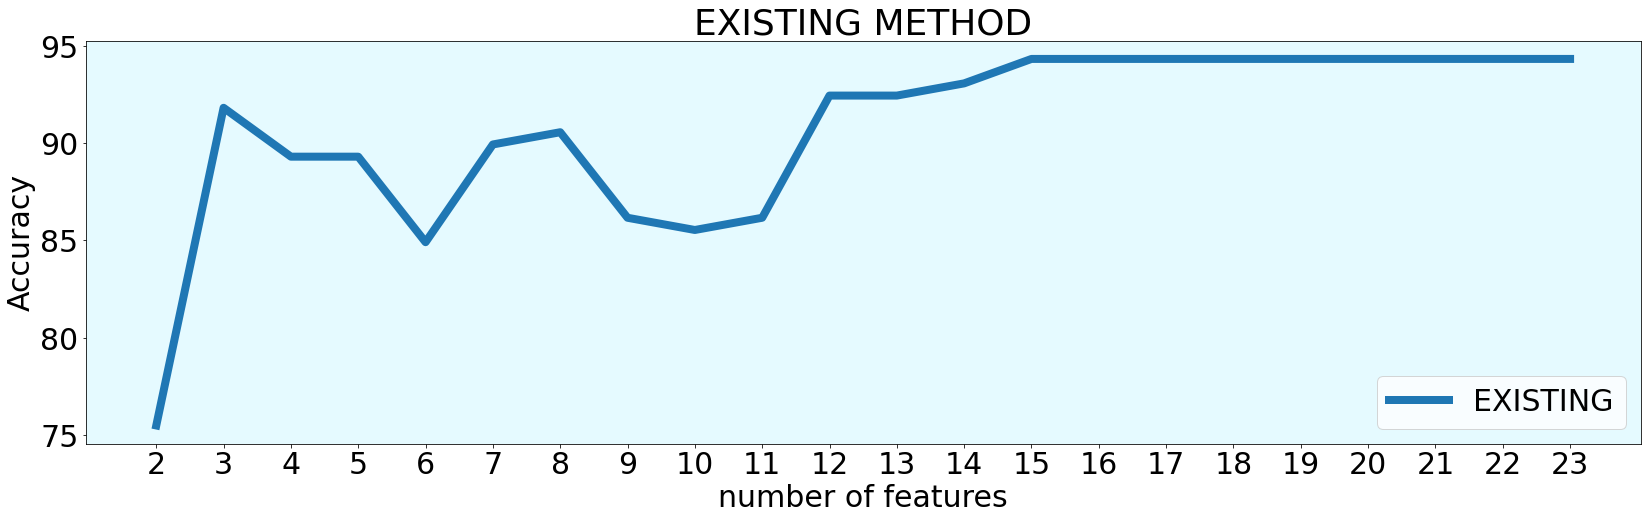

In [ ]:
y2=[accur1[i][0] for i in range(len(accur1))]
x2=[len(accur1[i][2]) for i in range(len(accur1))]
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x2, y2,linewidth=8, label="EXISTING")
ax.set_ylabel("Accuracy")
ax.set_xlabel("number of features")
ax.set_title("EXISTING METHOD")
ax.set_facecolor("#e5faff")
ax.set_xticks([len(accur1[i][2]) for i in range(len(accur1))])
ax.set_xticklabels([str(len(accur1[i][2])) for i in range(len(accur1))])
plt.legend(loc='lower right', ncol=1)
plt.show()

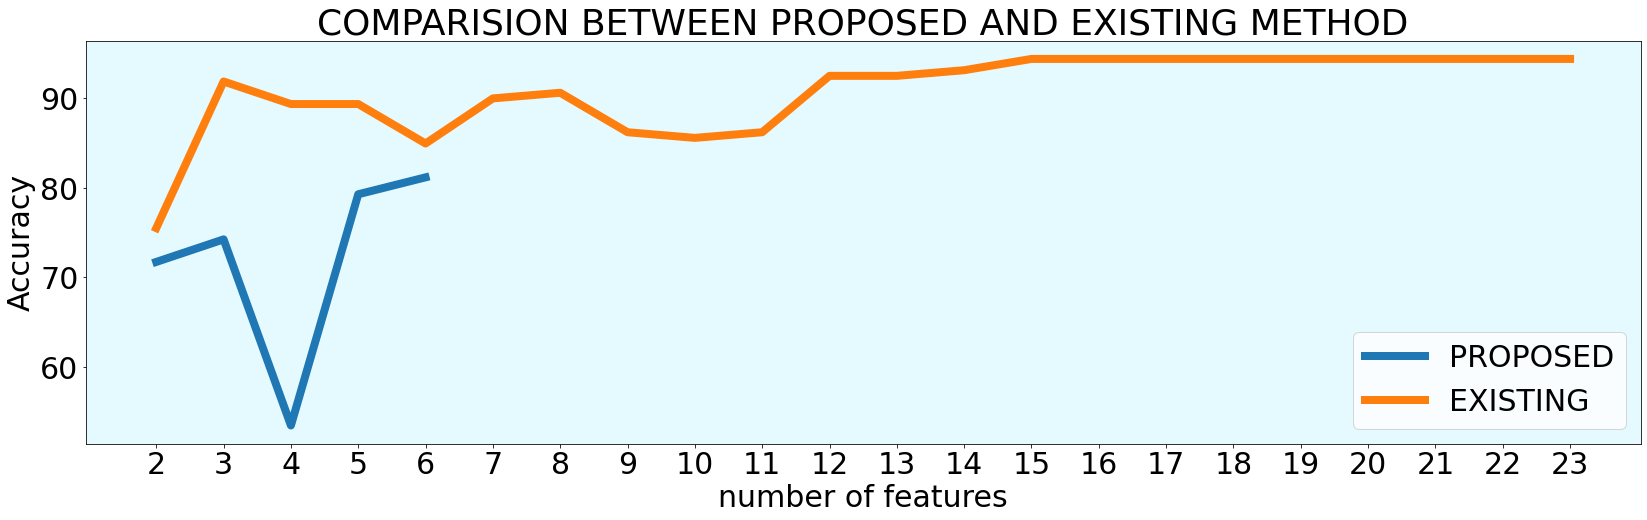

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x1, y1,linewidth=8, label="PROPOSED")
ax.plot(x2, y2,linewidth=8, label="EXISTING")
ax.set_ylabel("Accuracy")
ax.set_xlabel("number of features")
ax.set_title("COMPARISION BETWEEN PROPOSED AND EXISTING METHOD")
ax.set_facecolor("#e5faff")
ax.set_xticks([len(accur1[i][2]) for i in range(len(accur1))])
ax.set_xticklabels([str(len(accur1[i][2])) for i in range(len(accur1))])
plt.legend(loc='lower right', ncol=1)
plt.show()